Merve Ayaz - 18120205023


Nisa Zuhal Kaçan - 18120205002


Ali Fırat Özel - 18120205038

Elimizde 2020 senesine ait covid-19 verileri mevcut. 2020 yılı içerisinde İstanbul'un tüm ilçelerinde rağbet edilen lokasyon verilerinin analizini yaptık.
Elde ettiğimiz sonuçlara göre 2020 yılında hangi ilçelerin birbirlerine yakınlık gösterdiğini kümelendirerek (KMeans) grafik aracılığıyla gösterdik.
Bu analizdeki amacımız ilçe yoğunluklarına ve ziyaret edilen lokasyonlara göre çıkarımlarda bulunabilmekti. Elde ettiğimiz grafik sonuçlarını her bir grafiğin altında yorumlayacağız.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = 'https://drive.google.com/file/d/18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ/view?usp=sharing'
print(url.split('/')[-2])
url2020 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

df = pd.read_csv(url2020)
df.info()

18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167657 entries, 0 to 167656
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 167657 non-null  object 
 1   country_region                                      167657 non-null  object 
 2   sub_region_1                                        167336 non-null  object 
 3   sub_region_2                                        141692 non-null  object 
 4   metro_area                                          0 non-null       float64
 5   iso_3166_2_code                                     25644 non-null   object 
 6   census_fips_code                                    0 non-null       float64
 7   place_id                                            167657 non-null  object 
 8   date                          

In [ ]:
df_deneme = df.loc[df['sub_region_1'] == 'İstanbul']
df_deneme.dropna(axis=1, how='all', inplace=True)

df_deneme.dropna(subset=[df_deneme.columns[3], df_deneme.columns[7], df_deneme.columns[8], df_deneme.columns[9], df_deneme.columns[10], df_deneme.columns[11], df_deneme.columns[12]], inplace=True)
df_dmean = df_deneme.groupby('sub_region_2').mean()
df_dmean

C:\Users\alifi\AppData\Roaming\Python\Python38\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
sub_region_2,,,,,,
Arnavutköy,-25.883019,12.147170,30.501887,-50.535849,-16.479245,10.913208
Ataşehir,-44.125000,-6.864865,4.195946,-27.206081,-32.476351,12.891892
Avcılar,-29.358108,-8.158784,23.000000,-12.635135,-28.081081,10.665541
Bahçelievler,-43.850000,-4.913333,1.693333,-18.740000,-30.636667,11.160000
Bakırköy,-41.385714,2.382143,16.346429,-33.832143,-30.642857,10.439286
Bayrampaşa,-36.313793,-6.737931,17.993103,-35.858621,-24.982759,9.572414
Bağcılar,-34.957655,2.918567,-14.771987,-18.013029,-24.892508,9.785016
Başakşehir,-37.155405,-0.966216,9.530405,-13.800676,-24.790541,11.547297
Beykoz,-26.163823,-1.986348,18.092150,-13.860068,-31.000000,11.092150


-İstanbul iline ait verileri çektik.
-Lokasyonlarda Nan değeri bulunan satırları dahil etmedik.
-İlçelere göre gruplandırdık ve ortalamalarını aldık.

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=8)
km

KMeans()

In [ ]:
df_retail = df_dmean[['retail_and_recreation_percent_change_from_baseline']]
df_retail

,retail_and_recreation_percent_change_from_baseline
sub_region_2,
Arnavutköy,-25.883019
Ataşehir,-44.125000
Avcılar,-29.358108
Bahçelievler,-43.850000
Bakırköy,-41.385714
Bayrampaşa,-36.313793
Bağcılar,-34.957655
Başakşehir,-37.155405
Beykoz,-26.163823


In [ ]:
results = km.fit_predict(df_retail[['retail_and_recreation_percent_change_from_baseline']])
results

array([3, 6, 1, 6, 4, 2, 2, 2, 3, 1, 7, 0, 3, 6, 2, 4, 4, 3, 1, 0, 4, 2,
       3, 6, 2, 1, 4, 5, 0, 1, 3, 2, 3, 3, 4, 0, 7])

İlk lokasyon olan 'Retail and Recreation' için değişimleri kümelendirdik.

In [ ]:
df_retail['clusters'] = results
df_retail

C:\Users\alifi\AppData\Local\Temp/ipykernel_1724/1117322500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['clusters'] = results


,retail_and_recreation_percent_change_from_baseline,clusters
sub_region_2,,
Arnavutköy,-25.883019,3
Ataşehir,-44.125000,6
Avcılar,-29.358108,1
Bahçelievler,-43.850000,6
Bakırköy,-41.385714,4
Bayrampaşa,-36.313793,2
Bağcılar,-34.957655,2
Başakşehir,-37.155405,2
Beykoz,-26.163823,3


In [ ]:
df_retail_c1 = df_retail[df_retail.clusters==0]
df_retail_c2 = df_retail[df_retail.clusters==1]
df_retail_c3 = df_retail[df_retail.clusters==2]
df_retail_c4 = df_retail[df_retail.clusters==3]
df_retail_c5 = df_retail[df_retail.clusters==4]
df_retail_c6 = df_retail[df_retail.clusters==5]
df_retail_c7 = df_retail[df_retail.clusters==6]
df_retail_c8 = df_retail[df_retail.clusters==7]


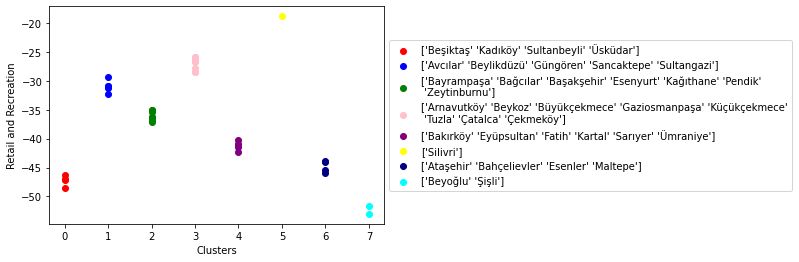

In [ ]:
plt.scatter(df_retail_c1.clusters, df_retail_c1.retail_and_recreation_percent_change_from_baseline, color='red', label=df_retail_c1.index.values)
plt.scatter(df_retail_c2.clusters, df_retail_c2.retail_and_recreation_percent_change_from_baseline, color='blue', label=df_retail_c2.index.values)
plt.scatter(df_retail_c3.clusters, df_retail_c3.retail_and_recreation_percent_change_from_baseline, color='green', label=df_retail_c3.index.values)
plt.scatter(df_retail_c4.clusters, df_retail_c4.retail_and_recreation_percent_change_from_baseline, color='pink', label=df_retail_c4.index.values)
plt.scatter(df_retail_c5.clusters, df_retail_c5.retail_and_recreation_percent_change_from_baseline, color='purple', label=df_retail_c5.index.values)
plt.scatter(df_retail_c6.clusters, df_retail_c6.retail_and_recreation_percent_change_from_baseline, color='yellow', label=df_retail_c6.index.values)
plt.scatter(df_retail_c7.clusters, df_retail_c7.retail_and_recreation_percent_change_from_baseline, color='navy', label=df_retail_c7.index.values)
plt.scatter(df_retail_c8.clusters, df_retail_c8.retail_and_recreation_percent_change_from_baseline, color='cyan', label=df_retail_c8.index.values)
plt.ylabel('Retail and Recreation')
plt.xlabel('Clusters')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Retail and Recreation değişim oranlarına göre yakın değerleri bir küme haline getirdik. Örneğin açık mavi ile gösterilen kümede Beyoğlu ve Şişli birbirlerine yakın değerler göstermiş ve en düşük değerler kümesi olmuştur. Aynı şekilde boğazdan uzak kalan yani merkezden uzaklaşan ilçelerde değerler yüksek çıkmıştır.

In [ ]:
df_grocery = df_dmean[['grocery_and_pharmacy_percent_change_from_baseline']]
df_grocery

,grocery_and_pharmacy_percent_change_from_baseline
sub_region_2,
Arnavutköy,12.147170
Ataşehir,-6.864865
Avcılar,-8.158784
Bahçelievler,-4.913333
Bakırköy,2.382143
Bayrampaşa,-6.737931
Bağcılar,2.918567
Başakşehir,-0.966216
Beykoz,-1.986348


In [ ]:
results = km.fit_predict(df_grocery[['grocery_and_pharmacy_percent_change_from_baseline']])
df_grocery['clusters'] = results
df_grocery

C:\Users\alifi\AppData\Local\Temp/ipykernel_1724/790411165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grocery['clusters'] = results


,grocery_and_pharmacy_percent_change_from_baseline,clusters
sub_region_2,,
Arnavutköy,12.147170,2
Ataşehir,-6.864865,4
Avcılar,-8.158784,4
Bahçelievler,-4.913333,4
Bakırköy,2.382143,6
Bayrampaşa,-6.737931,4
Bağcılar,2.918567,6
Başakşehir,-0.966216,0
Beykoz,-1.986348,0


In [ ]:
df_grocery_c1 = df_grocery[df_grocery.clusters==0]
df_grocery_c2 = df_grocery[df_grocery.clusters==1]
df_grocery_c3 = df_grocery[df_grocery.clusters==2]
df_grocery_c4 = df_grocery[df_grocery.clusters==3]
df_grocery_c5 = df_grocery[df_grocery.clusters==4]
df_grocery_c6 = df_grocery[df_grocery.clusters==5]
df_grocery_c7 = df_grocery[df_grocery.clusters==6]
df_grocery_c8 = df_grocery[df_grocery.clusters==7]

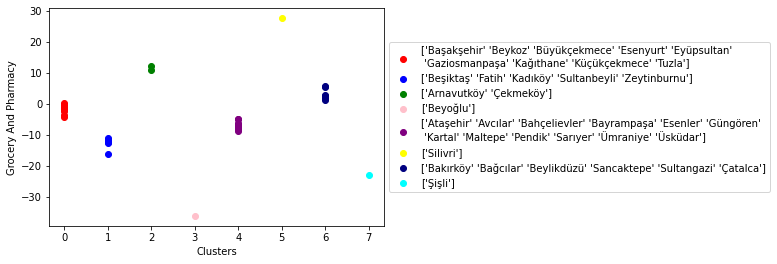

In [ ]:
plt.scatter(df_grocery_c1.clusters, df_grocery_c1.grocery_and_pharmacy_percent_change_from_baseline, color='red', label=df_grocery_c1.index.values)
plt.scatter(df_grocery_c2.clusters, df_grocery_c2.grocery_and_pharmacy_percent_change_from_baseline, color='blue', label=df_grocery_c2.index.values)
plt.scatter(df_grocery_c3.clusters, df_grocery_c3.grocery_and_pharmacy_percent_change_from_baseline, color='green', label=df_grocery_c3.index.values)
plt.scatter(df_grocery_c4.clusters, df_grocery_c4.grocery_and_pharmacy_percent_change_from_baseline, color='pink', label=df_grocery_c4.index.values)
plt.scatter(df_grocery_c5.clusters, df_grocery_c5.grocery_and_pharmacy_percent_change_from_baseline, color='purple', label=df_grocery_c5.index.values)
plt.scatter(df_grocery_c6.clusters, df_grocery_c6.grocery_and_pharmacy_percent_change_from_baseline, color='yellow', label=df_grocery_c6.index.values)
plt.scatter(df_grocery_c7.clusters, df_grocery_c7.grocery_and_pharmacy_percent_change_from_baseline, color='navy', label=df_grocery_c7.index.values)
plt.scatter(df_grocery_c8.clusters, df_grocery_c8.grocery_and_pharmacy_percent_change_from_baseline, color='cyan', label=df_grocery_c8.index.values)
plt.ylabel('Grocery And Pharmacy')
plt.xlabel('Clusters')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Grocery and Pharmacy değişim oranlarına göre yakın değerleri bir küme haline getirdik. Örneğin pembe ile gösterilen kümede Beyoğlu tek başına en düşük değer kümesini oluşturmuştur. Aynı şekilde yine boğazdan uzak kalan yani merkezden uzaklaşan ilçelerde değerler yüksek çıkmıştır. Bunun sebebi Şehir 

In [ ]:
df_parks = df_dmean[['parks_percent_change_from_baseline']]
results = km.fit_predict(df_parks[['parks_percent_change_from_baseline']])
df_parks['clusters'] = results
df_parks

C:\Users\alifi\AppData\Local\Temp/ipykernel_1724/1397342283.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_parks['clusters'] = results


,parks_percent_change_from_baseline,clusters
sub_region_2,,
Arnavutköy,30.501887,3
Ataşehir,4.195946,0
Avcılar,23.000000,3
Bahçelievler,1.693333,6
Bakırköy,16.346429,7
Bayrampaşa,17.993103,7
Bağcılar,-14.771987,4
Başakşehir,9.530405,0
Beykoz,18.092150,7


In [ ]:
df_parks_c1 = df_parks[df_parks.clusters==0]
df_parks_c2 = df_parks[df_parks.clusters==1]
df_parks_c3 = df_parks[df_parks.clusters==2]
df_parks_c4 = df_parks[df_parks.clusters==3]
df_parks_c5 = df_parks[df_parks.clusters==4]
df_parks_c6 = df_parks[df_parks.clusters==5]
df_parks_c7 = df_parks[df_parks.clusters==6]
df_parks_c8 = df_parks[df_parks.clusters==7]

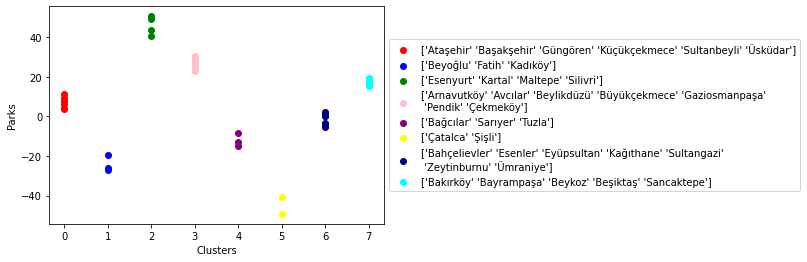

In [ ]:
plt.scatter(df_parks_c1.clusters, df_parks_c1.parks_percent_change_from_baseline, color='red', label=df_parks_c1.index.values)
plt.scatter(df_parks_c2.clusters, df_parks_c2.parks_percent_change_from_baseline, color='blue', label=df_parks_c2.index.values)
plt.scatter(df_parks_c3.clusters, df_parks_c3.parks_percent_change_from_baseline, color='green', label=df_parks_c3.index.values)
plt.scatter(df_parks_c4.clusters, df_parks_c4.parks_percent_change_from_baseline, color='pink', label=df_parks_c4.index.values)
plt.scatter(df_parks_c5.clusters, df_parks_c5.parks_percent_change_from_baseline, color='purple', label=df_parks_c5.index.values)
plt.scatter(df_parks_c6.clusters, df_parks_c6.parks_percent_change_from_baseline, color='yellow', label=df_parks_c6.index.values)
plt.scatter(df_parks_c7.clusters, df_parks_c7.parks_percent_change_from_baseline, color='navy', label=df_parks_c7.index.values)
plt.scatter(df_parks_c8.clusters, df_parks_c8.parks_percent_change_from_baseline, color='cyan', label=df_parks_c8.index.values)
plt.ylabel('Parks')
plt.xlabel('Clusters')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Parks değişim oranlarına göre yakın değerleri bir küme haline getirdik. Örneğin sarı ile gösterilen kümede Çatalca ve Şişli en düşük değerler kümesini oluşturuyor. Çatalca en düşük park oranına sahip ilçelerden biri. Şişli ilçesinde ise iş alanı daha fazla bulunuyor dolayısıyla binalar daha fazla olduğu için parklar daha az ve dolayısıyla oran da düşük çıkmış olabilir. Yeşil ile gösterilen küme ise pozitif yönde en yüksek değişime sahip olan ilçeler kümesi olarak görülüyor.

In [ ]:
df_transit = df_dmean[['transit_stations_percent_change_from_baseline']]
results = km.fit_predict(df_transit[['transit_stations_percent_change_from_baseline']])
df_transit['clusters'] = results
df_transit

C:\Users\alifi\AppData\Local\Temp/ipykernel_1724/1657912482.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transit['clusters'] = results


,transit_stations_percent_change_from_baseline,clusters
sub_region_2,,
Arnavutköy,-50.535849,6
Ataşehir,-27.206081,1
Avcılar,-12.635135,0
Bahçelievler,-18.740000,5
Bakırköy,-33.832143,1
Bayrampaşa,-35.858621,1
Bağcılar,-18.013029,5
Başakşehir,-13.800676,0
Beykoz,-13.860068,0


In [ ]:
df_transit_c1 = df_transit[df_transit.clusters==0]
df_transit_c2 = df_transit[df_transit.clusters==1]
df_transit_c3 = df_transit[df_transit.clusters==2]
df_transit_c4 = df_transit[df_transit.clusters==3]
df_transit_c5 = df_transit[df_transit.clusters==4]
df_transit_c6 = df_transit[df_transit.clusters==5]
df_transit_c7 = df_transit[df_transit.clusters==6]
df_transit_c8 = df_transit[df_transit.clusters==7]

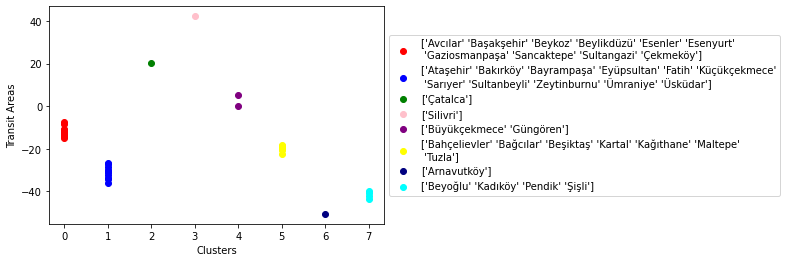

In [ ]:
plt.scatter(df_transit_c1.clusters, df_transit_c1.transit_stations_percent_change_from_baseline, color='red', label=df_transit_c1.index.values)
plt.scatter(df_transit_c2.clusters, df_transit_c2.transit_stations_percent_change_from_baseline, color='blue', label=df_transit_c2.index.values)
plt.scatter(df_transit_c3.clusters, df_transit_c3.transit_stations_percent_change_from_baseline, color='green', label=df_transit_c3.index.values)
plt.scatter(df_transit_c4.clusters, df_transit_c4.transit_stations_percent_change_from_baseline, color='pink', label=df_transit_c4.index.values)
plt.scatter(df_transit_c5.clusters, df_transit_c5.transit_stations_percent_change_from_baseline, color='purple', label=df_transit_c5.index.values)
plt.scatter(df_transit_c6.clusters, df_transit_c6.transit_stations_percent_change_from_baseline, color='yellow', label=df_transit_c6.index.values)
plt.scatter(df_transit_c7.clusters, df_transit_c7.transit_stations_percent_change_from_baseline, color='navy', label=df_transit_c7.index.values)
plt.scatter(df_transit_c8.clusters, df_transit_c8.transit_stations_percent_change_from_baseline, color='cyan', label=df_transit_c8.index.values)
plt.ylabel('Transit Areas')
plt.xlabel('Clusters')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Transit Areas değişim oranlarına göre yakın değerleri bir küme haline getirdik. Örneğin koyu mavi ile gösterilen kümede Arnavutköy tek başına en düşük değer kümesi olmuştur. Aynı şekilde yine boğazdan uzak kalan yani merkezden uzaklaşan ilçelerde değerler yüksek çıkmıştır. İnsanlar, şehrin gürültüsünden ve kirliliğinden kaçmak, doğa ile baş başa kalmak için yoğun bir şekilde şehir dışına yolculuk etmeye başlamış. Bu yüzden Silivri ,yukarıdaki grafikte en yüksek değeri almıştır.

In [ ]:
df_workplaces = df_dmean[['workplaces_percent_change_from_baseline']]
results = km.fit_predict(df_workplaces[['workplaces_percent_change_from_baseline']])
df_workplaces['clusters'] = results
df_workplaces

C:\Users\alifi\AppData\Local\Temp/ipykernel_1724/2719183126.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_workplaces['clusters'] = results


,workplaces_percent_change_from_baseline,clusters
sub_region_2,,
Arnavutköy,-16.479245,7
Ataşehir,-32.476351,3
Avcılar,-28.081081,4
Bahçelievler,-30.636667,1
Bakırköy,-30.642857,1
Bayrampaşa,-24.982759,6
Bağcılar,-24.892508,6
Başakşehir,-24.790541,6
Beykoz,-31.000000,1


In [ ]:
df_workplaces_c1 = df_workplaces[df_workplaces.clusters==0]
df_workplaces_c2 = df_workplaces[df_workplaces.clusters==1]
df_workplaces_c3 = df_workplaces[df_workplaces.clusters==2]
df_workplaces_c4 = df_workplaces[df_workplaces.clusters==3]
df_workplaces_c5 = df_workplaces[df_workplaces.clusters==4]
df_workplaces_c6 = df_workplaces[df_workplaces.clusters==5]
df_workplaces_c7 = df_workplaces[df_workplaces.clusters==6]
df_workplaces_c8 = df_workplaces[df_workplaces.clusters==7]

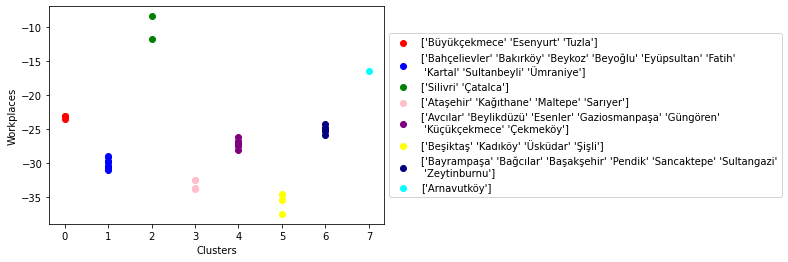

In [ ]:
plt.scatter(df_workplaces_c1.clusters, df_workplaces_c1.workplaces_percent_change_from_baseline, color='red', label=df_workplaces_c1.index.values)
plt.scatter(df_workplaces_c2.clusters, df_workplaces_c2.workplaces_percent_change_from_baseline, color='blue', label=df_workplaces_c2.index.values)
plt.scatter(df_workplaces_c3.clusters, df_workplaces_c3.workplaces_percent_change_from_baseline, color='green', label=df_workplaces_c3.index.values)
plt.scatter(df_workplaces_c4.clusters, df_workplaces_c4.workplaces_percent_change_from_baseline, color='pink', label=df_workplaces_c4.index.values)
plt.scatter(df_workplaces_c5.clusters, df_workplaces_c5.workplaces_percent_change_from_baseline, color='purple', label=df_workplaces_c5.index.values)
plt.scatter(df_workplaces_c6.clusters, df_workplaces_c6.workplaces_percent_change_from_baseline, color='yellow', label=df_workplaces_c6.index.values)
plt.scatter(df_workplaces_c7.clusters, df_workplaces_c7.workplaces_percent_change_from_baseline, color='navy', label=df_workplaces_c7.index.values)
plt.scatter(df_workplaces_c8.clusters, df_workplaces_c8.workplaces_percent_change_from_baseline, color='cyan', label=df_workplaces_c8.index.values)
plt.ylabel('Workplaces')
plt.xlabel('Clusters')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Workplaces değişim oranlarına göre yakın değerleri bir küme haline getirdik. Örneğin sarı ile gösterilen kümede 'Beşiktaş' , 'Kadıköy' , 'Üsküdar', 'Şişli' tek başına en düşük değerler kümesi olmuştur. Aynı şekilde yine boğazdan uzak kalan yani merkezden uzaklaşan ilçelerde değerler yüksek çıkmıştır. Çalışma ortamları normalde merkezi ilçelerde bulunmasına rağmen , bu dönemde uzaktan çalışma yaygınlaşmış ve iş yerleri kapanmıştır. Bu sebepten ötürü merkezi konumlarda düşüş yaşanmış olabilir.

Sonuç : 2020 Yılında covid-19 kapsamında alınan önlemler neticesinde , İstanbulda şehir merkezinden uzakta ve yeşil alanların yoğun olduğu (Parklar) lokasyonlarda (Silivri vb.) popülasyonda artış görüntülenmiştir. Evde çalışma/kalma oranında, covid-19 yasakları sebebi ile artış görüntülenmiş. Normalde nüfusun az olduğu sakin bölgelere ilgi artarken, merkezi ve yoğun lokasyonlarda (Kadıköy , Beşiktaş vb. ) genel olarak yoğunluk azalmış durumda.